<a href="https://colab.research.google.com/github/gugazan/MVP-Analise-de-Dados-e-Boas-Praticas/blob/main/MVP_Analise_de_Dados_e_Boas_Praticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome**: Gustavo Carvalho da Silva Pampillón Rodrigues

**Matrícula**: 4052025001253

<a href="https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset">Dataset: Book Recommendation Dataset</a>

# Descrição do Problema

O conjunto de dados do projeto foi feito para a implementação de um sistema de recomendação de livros, similar aos sistemas vistos em plataformas de e-commerce ou streaming de filmes, logo o objetivo principal é; Com base num título recomendar outras opções para o usuário.

# Hipóteses do Problema

- Usuários de diferentes faixas etárias possuem padrões de avaliações diferentes ?

- Autores possuem uma variação de avaliação muito grande ?

- Há correlação entre a idade do usuário e a idade do livro avaliado ?

# Tipo do problema

Este é um problema de classificação **não supervisionado**, visto que não existe um atributo alvo para o problema, e sim como base num livro, que outros livros um usuário pode gostar e para isso podemos usar algumas abordagens diferentes, como filtragem colaborativa, SVD ou K-means


# Abordagem alternativa

O objetivo principal do dataset é recomendação de livros, porém ele também possui um atributo "rating", a nota de um determinado livro, o que torna o dataset viável também para um abordagem de classificação **supervisionada** onde dado um conjunto de características o objetivo seria prever a nota aproximada de um livro. Porém para essa abordagem o dataset precisaria ser enriquecido com algumas informações, como número de páginas do livro e gênero.

# Atributos do Dataset

 O dataset está dividido em 3 documentos csv

<h3>Users</h3>

- *User-ID* (Identificação anonimizada do usuário)

- *Location* (localização do usuário, quando disponível)

- *Age* (Idade do usuário, quando disponível)

<h3>Books</h3>

- *ISBN* (*International Standard Book Number*, ID internacional de um livro)

- *Book-Title* (Título do livro)

- *Book-Author* (Autor do livro; Em caso de mais de um só o primeiro é mostrado)

- *Year-Of-Publication* (Ano da publicação - formato yyyy)

- *Publisher* (Editora que publicou o livro)

- *Image-URL-S* (Link da amazon para a capa do livro tamanho pequeno)
- *Image-URL-M* (Link da amazon para a capa do livro tamanho médio)
- *Image-URL-L* (Link da amazon para a capa do livro tamanho grande)

<h3>Ratings</h3>

- *User-ID* (Identificação anonimizada do usuário que avaliou o livro)
- *ISBN* (ID internacional do livro avaliado)
- *Book-Rating* (Nota recebida 0-10)

# Seleção dos Dados

Os dados foram coletados da plataforma bookcrossing.com entre agosto e setembro de 2004 contemplando 278,858 usários que fizeram 1,149,780 avaliações referentes à 271,379 livros

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial dos diferentes arquivos que compõem o dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# setup das urls do github e criação dos dataframes

url_users = "https://raw.githubusercontent.com/gugazan/MVP-Analise-de-Dados-e-Boas-Praticas/refs/heads/main/files/Users.csv"
url_books = "https://raw.githubusercontent.com/gugazan/MVP-Analise-de-Dados-e-Boas-Praticas/refs/heads/main/files/books.csv"
url_ratings = "https://raw.githubusercontent.com/gugazan/MVP-Analise-de-Dados-e-Boas-Praticas/refs/heads/main/files/ratings.csv"

df_users = pd.read_csv(url_users, on_bad_lines='skip')
df_books = pd.read_csv(url_books, on_bad_lines='skip')
df_ratings = pd.read_csv(url_ratings, on_bad_lines='skip')

/tmp/ipython-input-2-1954018534.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv(url_books, on_bad_lines='skip')


**Importante notar que houve um warning relativo aos itens da coluna "Year-Of-Publication", algo que vamos tratar mais pra frente**

In [ ]:
# primeiras linhas Users
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
# primeiras linhas Books
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# primeiras linhas Ratings
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# Total e Tipo das Instâncias

O dataset Users possui 278858 instâncias e 3 colunas, tendo dados do tipo inteiro, float e categórico

In [ ]:
print(f"Total de instâncias: {len(df_users)}")
print("\nTipos de dados por coluna:")
print(df_users.info())

Total de instâncias: 278858

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
None


O dataset Books possui 271360instâncias, com 8 colunas, todas do tipo categóricas, porém algumas no futuro vão ser transformadas em inteiros

In [ ]:
print(f"Total de instâncias: {len(df_books)}")
print("\nTipos de dados por coluna:")
print(df_books.info())

Total de instâncias: 271360

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None


O dataset de Ratings possui instâncias com 3 colunas, sendo 2 de inteiros e uma categórica

In [ ]:
print(f"Total de instâncias: {len(df_ratings)}")
print("\nTipos de dados por coluna:")
print(df_ratings.info())

Total de instâncias: 1149780

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
None


As três fontes de dados são linkadas por atributos identificadores como podemos ver na imagem abaixo. Na imagem podemos ver que o dataset de Ratings possui só um atributo próprio, e os outros dois servem para fazer um link aos outros datasets.
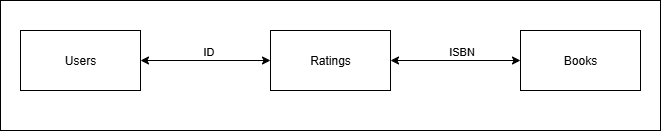

(Diagrama feito via draw.io pelo autor deste notebook)

# Análise de Dados
A partir de agora vamos analisar cada dataset separadamente



# DATASET USERS

# Estatísticas Descritivas

In [ ]:
# estatísticas descritivas básicas do dataset Users
df_users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


- Logo de cara podemos ver algumas informações interessantes desse resultado; Em primeiro lugar nada relativo ao *User-ID* nos vai ser útil, pois é apenas um identificador número e não possui sintática.

- No começo podemos observar que foi somado o número total das idades, algo que também não nos serve, porém depois podemos encontrar o *count* de idades distintas no fututro.

- Depois podemos observar que a idade média dos usuários é entre 34-35 anos, podemos supor em cima dessa informação que essa idade dos usuários implicam em pessoas com meios financeiros para adquirir livros assim como se trata de uma idade onde é comum do individuo médio já estar formado e ter uma família, logo a leitura surge como um hobby mais atrativo.

- No campo do std, podemos analisar o desvio padrão, de aproximadamente 14 anos, isso quer dizer que as idades variam em sua maioria entre 20 e 48 anos. O desvio padrão nesse caso é elevado, aproximadamente 41% da média, isso indica que existem usuários com idades muito diferentes, pois quanto maior o desvio padrão maior a dispersão de dados.

- Com os campos de min e max sendo 0 e 244 respectivamente podemos dizer com certeza que esses outliers são informações erradas, devido a impossibilidade da sua existência



In [ ]:
#idades distintas

df_users['Age'].nunique()

165

-  A informação de 165 idades distintas indica um grande número de outliers que deverão ser corrigidos no futuro

A idade não só é o único atributo númerico deste dataset, como é uma informação muito importante para entender o comportamento humano, então vamos gerar alguns gráficos para entender melhor esse atributo no nosso dataset

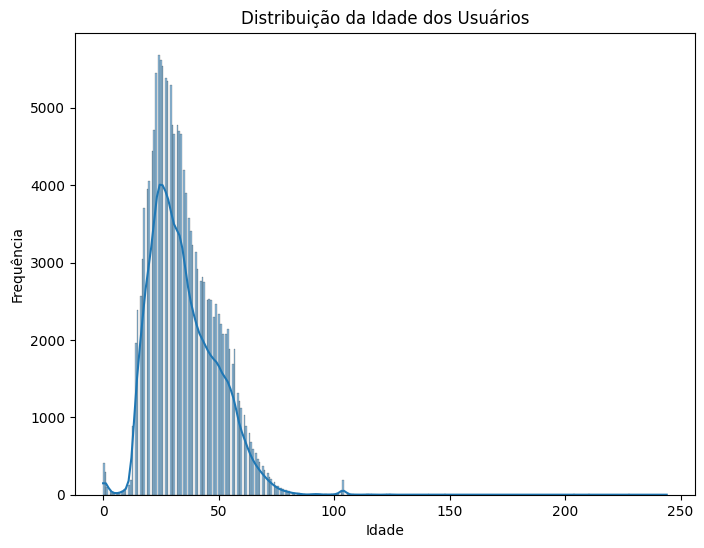

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df_users['Age'], kde=True)
plt.title('Distribuição da Idade dos Usuários')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

- Podemos ver que os outliers prejudicam a visualização do histograma, logo vamos tratar esse problema na etapa de pré processamento. Além disso a curva de densidade estimada (kde) nos indica uma distribuição unimodal na faixa dos 35 anos, como foi visto anteriormente.
- Após a retirada dos outliers vamos gerar esse gráfico novamente, apesar de ser improvável que retiremos mais alguma informação dele, ele ganhará uma melhor visualização


# DATASET BOOKS


In [ ]:
# estatísticas descritivas básicas do dataset Books
df_books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,020130998X,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/042509474X.0...,http://images.amazon.com/images/P/042509474X.0...,http://images.amazon.com/images/P/006091985X.0...
freq,1,27,632,13903,7535,2,2,2


- O dataset books também possui apenas uma variável númerica que podemos analisar, o ano de publicação, que no momento da carga do dataset já vimos que ela apresenta algum problema, então nesta etapa vamos tentar entender melhor ela


In [ ]:
#Analisando somente o ano de publicação
df_books['Year-Of-Publication'].describe()

,Year-Of-Publication
count,271360
unique,202
top,2002
freq,13903


Aqui podemos ver que o método não está respondendo tudo o que normalmente vemos, logo irei garantir que todas as instâncias desta coluna sejam inteiros, ação que já pode ser considerada parte do pré processamento

In [ ]:
# forçando os dados a se tornarem número e tranformando as instãncias onde a operação falhar em NaN para tratar depois
df_books['Year-Of-Publication'] = pd.to_numeric(df_books['Year-Of-Publication'], errors='coerce')

- Agora vamos tentar o método *describe* denovo

In [ ]:
#Segunda tentativa de análise
df_books['Year-Of-Publication'].describe()

,Year-Of-Publication
count,271357.000000
mean,1959.760817
std,257.994226
min,0.000000
25%,1989.000000
50%,1995.000000
75%,2000.000000
max,2050.000000


 - Logo de cara vemos que ele somou todos os anos, mas logo em sequência veremos a contagem de anos distintos

 - Na média, vemos que a o ano de publicação médio é de 1959, o que indica uma preferência por livros mais antigos

 - No desvio padrão temos o valor de 257 anos, número que parece bem alto e com base na média gera alguns valore impossiveis quando aplicado em cima dela

 - Ao analisar o min e max, sendo 0 e 2050 vemos valores imposíveis que certamente estão afetando as outras métricas e precisam ser tratados

Vamos visualizar essa distribuição dos anos por um histograma

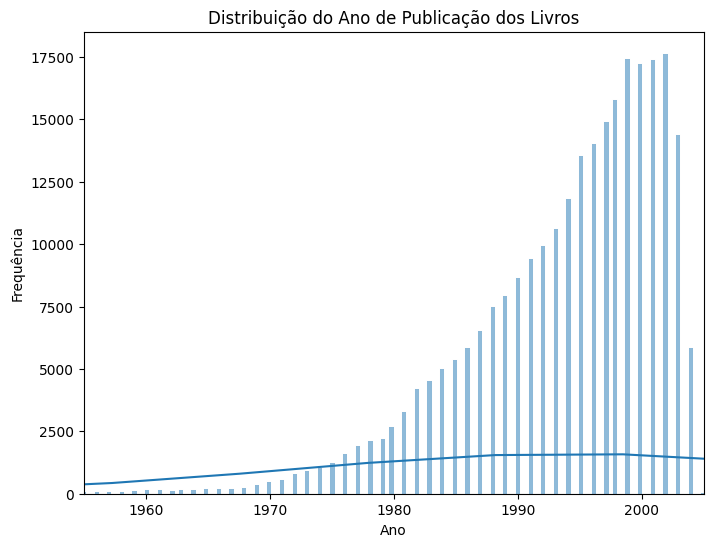

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df_books['Year-Of-Publication'], kde=True)
plt.xlim(1955, 2005) # Definir o intervalo do eixo X (testei o intervalo inferior manualmente)
plt.title('Distribuição do Ano de Publicação dos Livros')
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.show()

- Podemos ver um grande número de publicação (dos livros lidos) nos anos 90, como os dados foram colhidos em 2004 isso pode inidicar o tempo que um livro precisa para se tornar popular, por isso o alto nível de livros de alguns anos atrás

- A curva de densidade estimada (kde) parece discrepante em relação ao histograma se comparado ao resultado da distribuição de usuários, o que teoricamente poderia indicar um excesso de suavização da curva, porém nesse caso indica apenas uma ampla distribuição dos dados.

# DATASET RATINGS

In [ ]:
# estatísticas descritivas básicas do dataset Ratings
df_ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


- No dataset Ratings temos duas colunas de identificadores que conectam com outros datasets e a coluna "Book-Rating" que contém as avaliações e é a coluna que vamos analisar

- Na média temos um valor muito baixo o que pode indicar um grande número de avaliações 0. Segundo o autor do dataset as avaliações explícitas vão de uma escala de 1-10, porém existem também avaliações implícitas, que recebem o valor 0, essas avaliações são em maioria pessoas que adicionaram um livro a sua coleção, mas não o avaliaram, logo esses valores vão ter que ser tratados.

- Nos campos de 25% e 50% vemos também o número 0, mostrando que pelo menos metade do nosso dataset são compostos por feedback implícito, ao invés de uma nota produzida pelo usuário. Em um [comentário](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/discussion/201619) feito pelo autor do dataset ele explica que tais feedbacks implícitos podem ser cliques ou buscas feitas por usuários relativos aquele livro, como estamos preocupados com as avaliações em si, vamos no futuro retirar essa porção de avaliações implícitas do nosso dataset.

- Por fim, temos a nota 10 no max, informação condizente com uma avaliação numa escala de 1-10 e não mostra nenhuma nota fora dessa escala, provavelmente indicando que o input do usuário não era livre.

A retirada das avaliações implícitas pode ser considerada parte do pré processamento de dados, mas como metade do nosso dataset é composto por essas avaliações isso teria um alto impacto na nossa análise inicial de dados, logo vamos trabalhar nessa etapa agora.

In [ ]:
# Criação de um novo dataset sem as vavaliações implícitas

df_ratings_filtered = df_ratings[df_ratings['Book-Rating'] != 0]

In [ ]:
# Análise do novo dataset filtrado

df_ratings_filtered.describe()

,User-ID,Book-Rating
count,433671.000000,433671.000000
mean,135458.743451,7.601066
std,80678.385078,1.843798
min,8.000000,1.000000
25%,66619.000000,7.000000
50%,133184.000000,8.000000
75%,205735.000000,9.000000
max,278854.000000,10.000000


 - Logo de cara podemos ver que o dataset agora tem apenas 433671 registros, aproximadamente ~37% do dataset inicial. Pode parecer uma perda grande de dados, porém ainda temos quase meio milhão de registros para trabalhar, agora com uma qualidade muito maior de dados.

 - Agora na média temos um valor de 7.6, valor que parece ser muito mais condizente com a realidade de avaliações de usuários, visto que é comum pessoas lerem livros que já sabem que tem algum tipo de interesse, seja pelo tema ou pelo autor.

 - No campo de 25% temos o valor 7, indicando um baixo número de avaliações negativas, condizentes com a hipotése levantada no tópico acima de que pessoas leêm livros que já possuem interesse.

 - No desvio padrão temos o valor de 1.8, indicando que as notas variam pouco e ficam na faixa de 5.8 - 9,4, reforçando uma média alta de avaliações positivas.

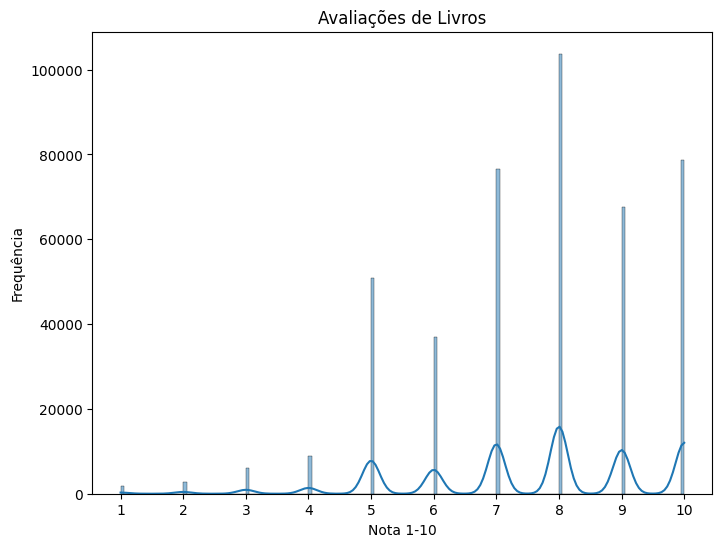

In [ ]:
plt.figure(figsize=(8, 6))

sns.histplot(df_ratings_filtered['Book-Rating'], kde=True)
plt.title('Avaliações de Livros')
plt.xticks(range(1, 11)) #forçando a mostrar todos os labels do eixo x
plt.xlabel('Nota 1-10')
plt.ylabel('Frequência')
plt.show()

- Com esse histograma podemos confirmar que as notas se concetram acima de 5, indicando que as pessoas tem uma tendência a não avaliar negativamente os livros lidos

- A curva de densidade estimada (kde) indica uma multimodalidade com diversos picos na segunda metade do grpafico.

# DATASETS CRUZADOS
- As informações mais valiosas que podemos obter vem da combinação dos datasets, assim podemos juntar de fato as avaliações ao usuário que a fez, sabendo assim também idade e localização do usuário, assim como ao livro, recebendo informações do autor, editora e ano de publicação; Podendo assim responder nossas hipóteses iniciais.

# Usuários de diferentes faixas etárias possuem padrões de avaliações diferentes ?

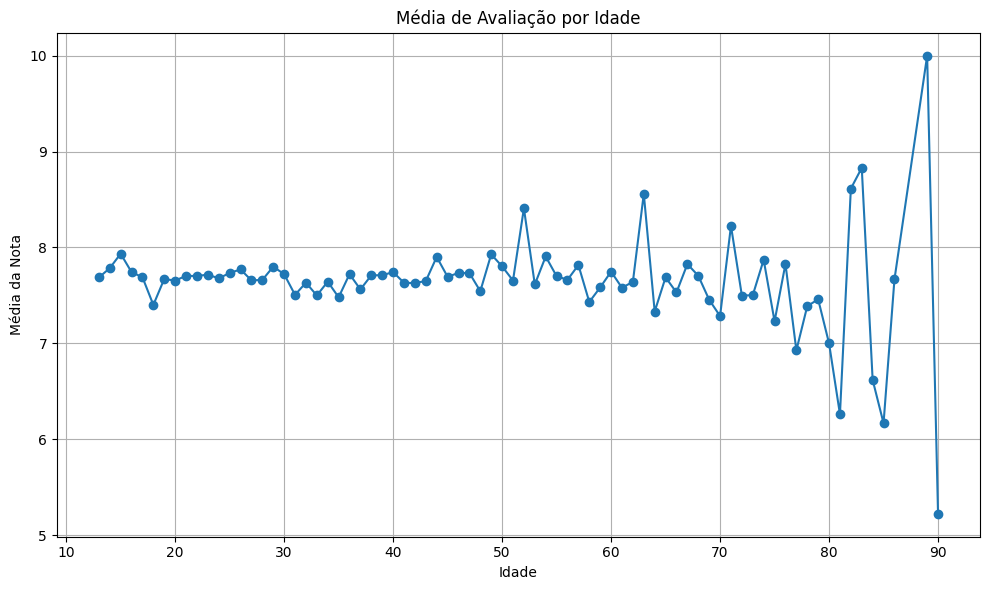

In [ ]:
# Unir com os dados de usuários
df_merged = pd.merge(df_ratings_filtered, df_users, on="User-ID", how="inner")

# Agrupar por idade e calcular a média das avaliações
mean_per_age = df_merged.groupby("Age")["Book-Rating"].mean().reset_index()

# Manter apenas idades plausíveis (entre 5 e 100 anos)
mean_per_age = mean_per_age[(mean_per_age["Age"] >= 13) & (mean_per_age["Age"] <= 90)] #setei a idade mínima para 13 anos, idade mínima comum para o uso
                                                                                                   #de diversos aplicativos e idade máxima para 90
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(mean_per_age["Age"], mean_per_age["Book-Rating"], marker='o')
plt.title("Média de Avaliação por Idade")
plt.xlabel("Idade")
plt.ylabel("Média da Nota")
plt.grid(True)
plt.tight_layout()
plt.show()

- Esse gráfico serve para responder uma das hipóteses inicias do projeto; "Usuários de diferentes faixas etárias possuem padrões de avaliações diferentes ?"
- Podemos observar que dos 10 aos 50 anos os usuários avaliam em média dentro de um intervalo de 7-8, indicando um comportamento parecido, e para essas idades a resposta da hipótese seria que não, diferentes idades avaliam da mesma forma.

- A partir dos 50 anos vemos uma mudança de comportamento, com alguns picos de avaliação, tanto para cima quanto para baixo. Esse comportamento de avaliação pode se dar por alguns motivos, como uma maior bagagem literário, paciência menor e pouca tolerância para novas obras e gêneros.

- A segunda metade do nosso gráfico muda a resposta da pergunta e se fosse analisado separadamente a resposta seria que sim, pois podemos visualizar que o desvio padrão aumento, variando em até 30% da escala total

- Agora para responder a hipótese olhando o conjunto da obra não temos um resultado binário como sim e não, na verdade a resposta de "Usuários de diferentes faixas etárias possuem padrões de avaliações diferentes ?" é que sim, mas somente a partir dos 50 anos que as avaliações começãm a divergir.

# Autores possuem uma variação de avaliação muito grande ?

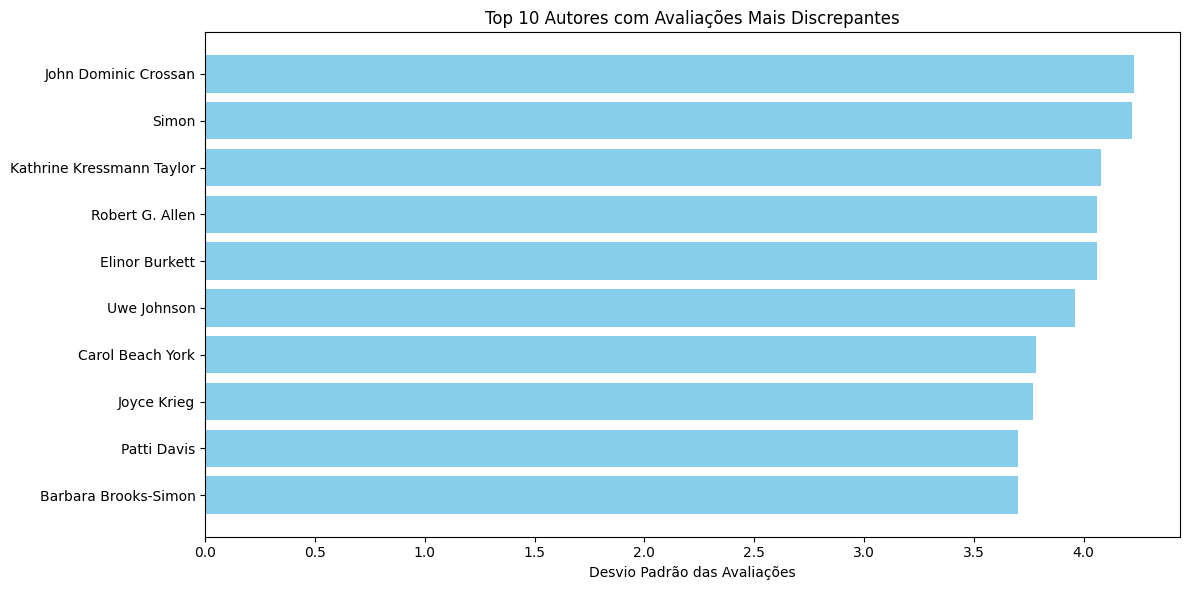

In [ ]:
# Juntar avaliações com dados dos livros
df_ratings_books = pd.merge(df_ratings_filtered, df_books, on="ISBN", how="inner")

# Calcular desvio padrão e contagem de avaliações por autor
std_per_author = df_ratings_books.groupby("Book-Author")["Book-Rating"].std().reset_index()
count_per_author = df_ratings_books.groupby("Book-Author")["Book-Rating"].count().reset_index()

# Mesclar os dois resultados
std_per_author = std_per_author.merge(count_per_author, on="Book-Author")
std_per_author.columns = ["Book-Author", "Rating-Std", "Rating-Count"]

# Manter apenas autores com pelo menos 5 avaliações
std_per_author = std_per_author[std_per_author["Rating-Count"] >= 5]

# Selecionar os 10 autores com maior desvio padrão
top_std = std_per_author.sort_values(by="Rating-Std", ascending=False).head(10)

# Plotar
plt.figure(figsize=(12, 6))
plt.barh(top_std["Book-Author"], top_std["Rating-Std"], color='skyblue')
plt.xlabel("Desvio Padrão das Avaliações")
plt.title("Top 10 Autores com Avaliações Mais Discrepantes")
plt.gca().invert_yaxis()  # Coloca o maior no topo
plt.tight_layout()
plt.show()

- Nesse primeiro gráfico vamos analisar os autores com o maior desvio padrão nas avaliações de seus livros, para entender o extremo superior do problema levantado.

- Podemos observar diversos autores com variância em suas avaliações maior que 3.5, com alguns chegando até 4 pontos. Num dataset com média de avaliação ~7 vemos que o mesmo autor pode receber avaliações entre 3 e 10 de nota, mostrando que existem sim diversos autores com obras polêmicas e que mostram um comportamento "ame ou odeie"


In [ ]:
avg_std = std_per_author["Rating-Std"].mean()

print(f"Média do desvio padrão das avaliações por autor (mínimo 5 avaliações): {avg_std:.2f}")

Média do desvio padrão das avaliações por autor (mínimo 5 avaliações): 1.68


- Agora analisando o dataset como um todo, e não só os extremos vemos que a média do desvio padrão das avaliações por autor é de apenas 1.5, e com essa informação podemos responder que em média os autores não possuem uma variação muito alta de avaliações em suas obras, ilustrando de certa forma um padrão de qualidade, seja positivo ou negativo.

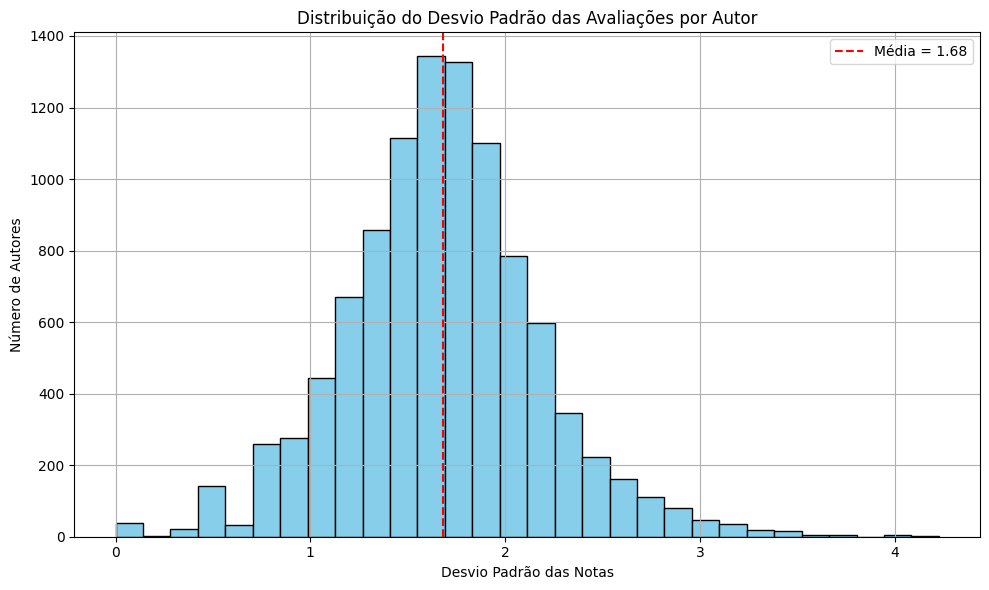

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(std_per_author["Rating-Std"], bins=30, color='skyblue', edgecolor='black')
plt.axvline(std_per_author["Rating-Std"].mean(), color='red', linestyle='--', label=f'Média = {std_per_author["Rating-Std"].mean():.2f}')
plt.title("Distribuição do Desvio Padrão das Avaliações por Autor")
plt.xlabel("Desvio Padrão das Notas")
plt.ylabel("Número de Autores")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Com esse gráfico reforçamos que a maioria dos autores possui um desvio padrão pequeno relativo a suas avaliações, indicando um variância pequena de suas notas

# Há correlação entre a idade do usuário e a idade do livro avaliado ?

In [ ]:
# Unir ratings com dados de livros e usuários
df_books_ratings = pd.merge(df_ratings_filtered, df_books, on="ISBN", how="inner")
df_merged_full = pd.merge(df_books_ratings, df_users, on="User-ID", how="inner")

# Converter coluna de ano para numérico
df_merged_full["Year-Of-Publication"] = pd.to_numeric(
    df_merged_full["Year-Of-Publication"], errors="coerce"
)

# Filtrar valores plausíveis
df_merged_full = df_merged_full[
    (df_merged_full["Age"].between(5, 100)) &
    (df_merged_full["Year-Of-Publication"].between(1900, 2025))
]

# Calcular a "idade do livro" na época da análise (supondo ano de referência = 2005)
df_merged_full["Book-Age"] = 2005 - df_merged_full["Year-Of-Publication"]

# Remover livros com idade negativa (erro de entrada)
df_merged_full = df_merged_full[df_merged_full["Book-Age"] >= 0]

# Calcular correlação entre idade do usuário e idade do livro
correlacao = df_merged_full[["Age", "Book-Age"]].corr().iloc[0, 1]
print(f"Correlação entre idade do usuário e idade do livro: {correlacao:.3f}")

Correlação entre idade do usuário e idade do livro: -0.025


- Com esse cálculo podemos ver logo de caro que a corrleção dessas informações é quase nula, indicando que não é verdade que a idade do usuário implica de alguma forma na idade do livro avaliado

- A seguir vamos confirmar essa informação com alguns gráficos

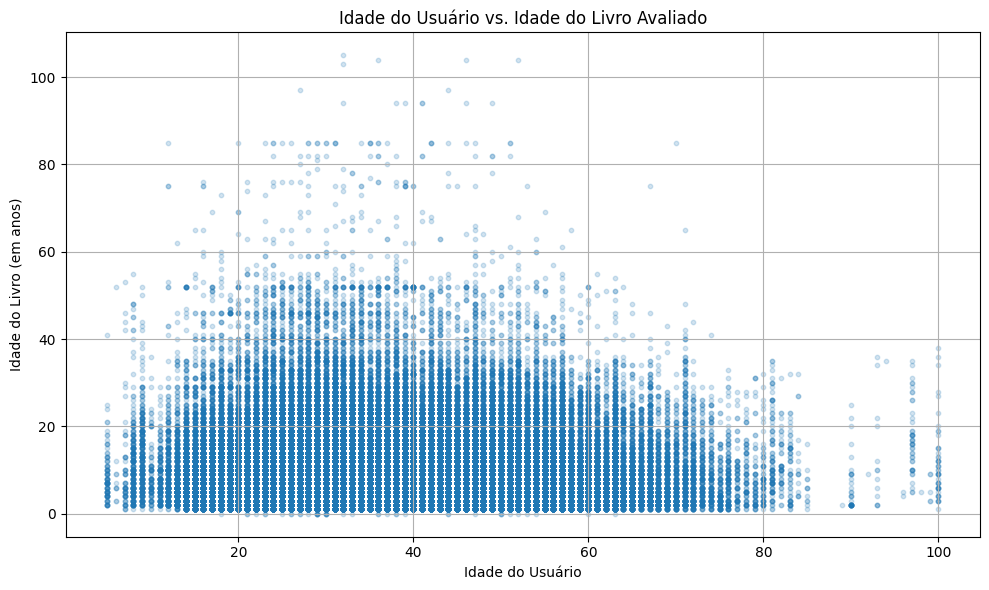

In [ ]:
# Gerar gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df_merged_full["Age"], df_merged_full["Book-Age"], alpha=0.2, s=10)
plt.title("Idade do Usuário vs. Idade do Livro Avaliado")
plt.xlabel("Idade do Usuário")
plt.ylabel("Idade do Livro (em anos)")
plt.grid(True)
plt.tight_layout()
plt.show()

- Podemos observar que os pontos estão bastante dispersos, sem tendência clara, reforçando o resultado do cálculo anterior

- Leitores de todas as idades parecem avaliar livros de diferentes épocas com frequência semelhante.



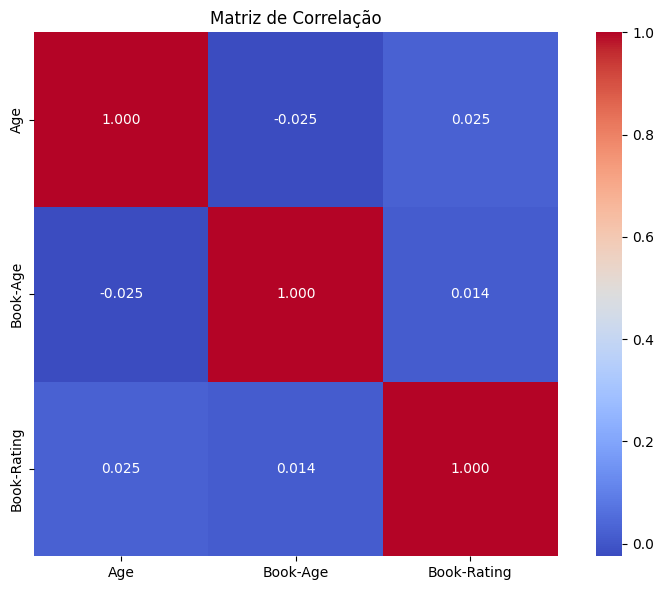

In [ ]:
# Gerar matriz de correlação
correlation_matrix = df_merged_full[["Age", "Book-Age", "Book-Rating"]].corr()

# Plotar heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".3f", square=True)
plt.title("Matriz de Correlação")
plt.tight_layout()
plt.show()

- Com o heatmap da matriz de correlação dos atributos temos confirmação absoluta de que os dados não se relacionam e de que não há correlação entre a idade do usuário e a idade do livro avaliado como foi levantado na hipótese.

# Pré Processamento de Dados
- Com todas as hipóteses respondidas na parte de Análise de Dados, agora vamor preparar o dataset para uma futura etapa de machine learning.

- Algums alterações já foram feitas nos datasets na etapa de Análise de dados, como a retirada de valores 0 do dataset de Ratings e o ajuste de tipo no dataset Books.

- Nossos datasets possuem em sua maioria valores categóricos que não podem ser transformados em valores numéricos, como nome, ISBN e editora, logo essa etapa se focará nas poucas colunas em que algo pode ser feito, resultando numa seção de Pré processamento de dados um pouco reduzida

# Tratamento de Valores Nulos

In [ ]:
# Verificar a presença de valores nulos
print("Valores nulos no dataset Users:")
df_users.isnull().sum()

Valores nulos no dataset Users:


,0
User-ID,0
Location,0
Age,110762


In [ ]:
# Verificar a presença de idades maiores que 90 (valor arbitrário) e menores que 13 (idade mínima para se usar redes sociais)
invalid_age = ((df_users["Age"] <= 13) | (df_users["Age"] >= 90)).sum()
print(f"Número de usuários com idade maior que 90: {invalid_age}")

Número de usuários com idade maior que 90: 2786


- No dataset users temos 110762 usuários com idade NaN e 2768 com idades consideradas inválidas no nosso contexto. (13=< idade <= 90:)

In [ ]:
# Tratamento das valores inválidos
# Vamos substituir pela média composta apenas dos valores válidos

# Cálculo da média
valid_age = df_users["Age"].dropna()
valid_age = valid_age[(valid_age >= 13) & (valid_age <= 90)]
avg_age = valid_age.mean()

print(avg_age)


34.81040312876053


In [ ]:
# Substituindo no dataset (média arredondada)

avg_age = round(avg_age)

df_users["Age"] = df_users["Age"].apply(
    lambda x: avg_age if pd.isna(x) or x < 13 or x > 90 else x
)


Agora vamos fazer o mesmo com o ano dataset Books

In [ ]:
# Verificar a presença de valores nulos
print("Valores nulos no dataset Books:")
df_books.isnull().sum()

Valores nulos no dataset Books:


,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,3
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


Conceitualmente não faz sentido um autor ou uma editora com valores nulos, e como são informações categóricas não podemos substituir por nenhuma média, então para esses casos vamos dropar essas instâncias

In [ ]:
df_books = df_books.dropna(subset=["Book-Author", "Publisher"])

In [ ]:
# Segunda checagem
print("Valores nulos no dataset Books:")
df_books.isnull().sum()

Valores nulos no dataset Books:


,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,3
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


No caso dos valores nulos do ano de publicação podemos substituir pela média, também vamos checar por valores fora do escopo, como ano 0 ou algum ano após a data de coleta dos dados (2004)

In [ ]:
# Substituindo os NaN pela média

avg_year =  round(df_books["Year-Of-Publication"].mean())

df_books["Year-Of-Publication"] = df_books["Year-Of-Publication"].fillna(avg_year)

Vamos agora tratar os anos inválidos com base no contexto

In [ ]:
# Definir intervalo válido (1440 é a data de criação da primeira prensa)
valid_years = df_books["Year-Of-Publication"].between(1440, 2004)

# Calcular média apenas dos anos válidos
avg_valid_year = round(df_books.loc[valid_years, "Year-Of-Publication"].mean())

# Substituir valores fora do intervalo por essa média
df_books.loc[~valid_years, "Year-Of-Publication"] = avg_valid_year

# Verificar resultado
print("Ano médio usado:", avg_valid_year)
print("Anos fora do intervalo após limpeza:", (~df_books["Year-Of-Publication"].between(1440, 2004)).sum())

Ano médio usado: 1994
Anos fora do intervalo após limpeza: 0


# Normalização dos Dados
- O único dado que pode ser normalizado no nosso caso é a avalição dos livros, logo vamos coloca-lo numa escala de 0-1 para melhor desempenho em algoritimos de machine learning

In [ ]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [ ]:
df_ratings_normalizado = df_ratings_filtered.copy()

scaler_norm.fit(df_ratings_normalizado[["Book-Rating"]])

df_ratings_normalizado.loc[:, "Book-Rating-Normalized"] = scaler_norm.transform(
    df_ratings_normalizado[["Book-Rating"]]
)

No nosso contexto estamos trabalhando com um projeto com foco em aprendizado não supervisionado, logo como não existe um alvo não é necessário fazer o split entre dados de treino e teste


Tendo em vista que KNN é o algoritimo mais usado em sistemas de recomendações vamos somente usar o MinMaxScaler. Caso o algoritimo de escolha fosse o SVD faria sentido usar Z-Scaling no lugar.

Agora vamos nos livra de algumas colunas que não vão nos ser úteis como as colunas de link de imagem, que apenas nos direcionam para a foto do livro na amazon, em 3 tamanhos diferentes

In [ ]:
# Remover as colunas de URLs
df_books2 = df_books.drop(columns=["Image-URL-S", "Image-URL-M", "Image-URL-L"])

# Verificar as colunas restantes
print(df_books2.columns)

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher'],
      dtype='object')


# Abordagem Alternativa

- No início do notebook foi proposta uma abordagem alternativa de aprendizado supervisionado para a predição da nota de um livro, então nessa etapa vamos preprar os dados para essa alternativa


In [ ]:
# Usando datasets alternativos

df_books_alt = df_books
df_users_alt = df_users
df_ratings_alt = df_ratings

# Unir os dados
df = df_ratings_alt.merge(df_users_alt, on="User-ID", how="inner")
df = df.merge(df_books_alt, on="ISBN", how="inner")

# Remover colunas irrelevantes
df.drop(columns=["ISBN", "Book-Title", "Image-URL-S", "Image-URL-M", "Image-URL-L"], errors="ignore", inplace=True)

# Tratar a coluna "Age"
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["Age"] = df["Age"].mask((df["Age"] < 13) | (df["Age"] > 90))
df["Age"] = df["Age"].fillna(df["Age"].mean())

# Tratar a coluna "Year-Of-Publication"
df["Year-Of-Publication"] = pd.to_numeric(df["Year-Of-Publication"], errors="coerce")
df["Year-Of-Publication"] = df["Year-Of-Publication"].mask(
    (df["Year-Of-Publication"] < 1000) | (df["Year-Of-Publication"] > 2004)
)
df["Year-Of-Publication"] = df["Year-Of-Publication"].fillna(df["Year-Of-Publication"].mean())


# Frequency Encoding para "Book-Author", "Publisher" e "Location"
for col in ["Book-Author", "Publisher", "Location"]:
    freq_map = df[col].value_counts()
    df[col + "_Freq"] = df[col].map(freq_map)

# Remover colunas originais categóricas
df.drop(columns=["Book-Author", "Publisher", "Location"], inplace=True)

# Separar variáveis preditoras (X) e alvo (y)
X = df.drop(columns=["Book-Rating"])
y = df["Book-Rating"]

- Condensei diveras operações feitas ao longo do notebook em uma célula única por se tratar de uma abordagem alternativa

- Separei os dados em treino e teste

- Usei o frequency enconding em diversas colunas para substituir dados categórios pela frequência em que aparecem no dataset

- One Hot Encoding não seria útil aqui pela alta quantidade de dados distintos, que gerariam uma explosão de dimensionalidade e overfitting no modelo

- Dessa forma a abordagem alternativa está pronta para o uso, por exemplo, do algoritimo de Random Forest Refressor ou Gradient boosting

# Conclusão

Na etapa de análise de dados conseguimos investigar todas as nossas hipóteses, validando uma e refutando outras duas:

- *Usuários de diferentes faixas etárias possuem padrões de avaliações diferentes ?* Sim, mas só a partir dos 50 anos

- *Autores possuem uma variação de avaliação muito grande ?* Não, apesar de alguns outliers a variação é pequena, em torno de 1.5

- *Há correlação entre a idade do usuário e a idade do livro avaliado ?* Nenhuma, usários de diferentes idades avaliam livros de diferentes épocas

Apesar de uma etapa de pré processamento de dados um pouco reduzidas conseguimos normalizar dados em prepara para a implementação de um algoritimo KNN, assim como lidar com dados faltantes, errados e informações desnecessários. Além disso preparamos uma alternativa nos dados caso um sistema de aprendizado supervisionado queira ser implementado visando prever a nota de um livro